## I. Cleaning DATA 

In [30]:
# Bibliothèque 
import pandas as pd
from sqlalchemy import create_engine, text
import pymysql.cursors
import os
import getpass
import urllib.parse
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# Load data 
df1 = pd.read_csv("/Users/redarerizani/Desktop/ironhack/Final project /Sleep-Health-and-Lifestyle/csv file /Sleep_health_and_lifestyle_dataset .csv")
df2 = pd.read_csv("/Users/redarerizani/Desktop/ironhack/Final project /Sleep-Health-and-Lifestyle/csv file /Sleep_health_and_lifestyle_dataset_part_2 2.csv")
#display data 
df1.head(5)


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [32]:
df2.drop(0, inplace=True)
df2


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
1,375,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
2,376,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
3,377,Male,29,Doctor,6.1,6,30,8,Normal,120/80,70,8000,NaN
4,378,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
5,379,Male,29,Doctor,6.1,6,30,8,Normal,120/80,70,8000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,555,Female,43,Teacher,6.7,7,45,4,Overweight,135/90,65,6000,Insomnia
182,556,Male,43,Salesperson,6.5,6,45,7,Overweight,130/85,72,6000,Insomnia
183,557,Female,43,Teacher,6.7,7,45,4,Overweight,135/90,65,6000,Insomnia
184,558,Male,43,Salesperson,6.4,6,45,7,Overweight,130/85,72,6000,Insomnia


In [33]:
sleep_df = pd.concat([df1, df2], ignore_index=True)
sleep_df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,555,Female,43,Teacher,6.7,7,45,4,Overweight,135/90,65,6000,Insomnia
555,556,Male,43,Salesperson,6.5,6,45,7,Overweight,130/85,72,6000,Insomnia
556,557,Female,43,Teacher,6.7,7,45,4,Overweight,135/90,65,6000,Insomnia
557,558,Male,43,Salesperson,6.4,6,45,7,Overweight,130/85,72,6000,Insomnia


In [34]:
# Formatting column 
# Convert column names to lowercase
sleep_df.columns = sleep_df.columns.str.lower()

# Replace spaces in column names with underscores and remove extra spaces
sleep_df.columns = sleep_df.columns.map(lambda word: word.strip().replace(" ", "_"))
sleep_df

,person_id,gender,age,occupation,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,bmi_category,blood_pressure,heart_rate,daily_steps,sleep_disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,555,Female,43,Teacher,6.7,7,45,4,Overweight,135/90,65,6000,Insomnia
555,556,Male,43,Salesperson,6.5,6,45,7,Overweight,130/85,72,6000,Insomnia
556,557,Female,43,Teacher,6.7,7,45,4,Overweight,135/90,65,6000,Insomnia
557,558,Male,43,Salesperson,6.4,6,45,7,Overweight,130/85,72,6000,Insomnia


In [35]:
sleep_df['occupation'].unique()

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

In [36]:
sleep_df.isna().sum()

person_id                    0
gender                       0
age                          0
occupation                   0
sleep_duration               0
quality_of_sleep             0
physical_activity_level      0
stress_level                 0
bmi_category                 0
blood_pressure               0
heart_rate                   0
daily_steps                  0
sleep_disorder             375
dtype: int64

In [37]:
sleep_df["sleep_disorder"].fillna("no disorder", inplace=True)


In [38]:
sleep_df['bmi_category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [39]:
sleep_df["bmi_category"].replace("Normal Weight", "Normal", inplace=True)
sleep_df['bmi_category'].unique()


array(['Overweight', 'Normal', 'Obese'], dtype=object)

Working on blood pressure

Systolic Pressure: This is the higher number and represents the pressure in the arteries when the heart beats and pumps blood out.

-Normal: Less than 120 mmHg
-Elevated: 120-129 mmHg
-Hypertension Stage 1: 130-139 mmHg
-Hypertension Stage 2: 140 mmHg or higher

Diastolic Pressure: This is the lower number and represents the pressure in the arteries when the heart is at rest between beats.

-Normal: Less than 80 mmHg
-Elevated: 80-89 mmHg
-Hypertension Stage 1: 90-99 mmHg
-Hypertension Stage 2: 100 mmHg or higher

-Normal: Both systolic and diastolic pressures are within normal ranges.
-Prehypertension: Blood pressure is elevated but not yet classified as hypertension.
-Hypertension: High blood pressure, which may be further categorized into Stage 1 or Stage 2 based on the severity.

In [40]:
# Extract Systolic and Diastolic Pressure
sleep_df['systolic_pressure'] = sleep_df['blood_pressure'].apply(lambda x: int(x.split("/")[0]))
sleep_df['diastolic_pressure'] = sleep_df['blood_pressure'].apply(lambda x: int(x.split("/")[1]))

# Define thresholds and categories for blood pressure classes
list_high = [0, 90, 120, 130, max(sleep_df.systolic_pressure)]
classif = [0, 1, 10, 100]  # 0: Hypotension, 1: Normal, 10: Elevated, 100: Hypertension
list_low = [0, 60, 80, 90, max(sleep_df.diastolic_pressure)]

# Categorize Systolic and Diastolic Pressure into Classes
sleep_df['systolic_classes'] = pd.cut(sleep_df['systolic_pressure'], 4, labels=classif).astype(int)
sleep_df['diastolic_classes'] = pd.cut(sleep_df['diastolic_pressure'], 4, labels=classif).astype(int)

# Assign descriptive labels to each row based on combined blood pressure classes
def check_pressure(x):
    if x >= 100:
        return "Hypertension"
    elif x >= 10:
        return "Elevated"
    elif x >= 1:
        return "Normal"
    elif x == 0:
        return "Hypotension"

sleep_df['blood_pressure_class'] = sleep_df['systolic_classes'] + sleep_df['diastolic_classes']
sleep_df['blood_pressure_class'] = sleep_df['blood_pressure_class'].apply(check_pressure)

# Drop unnecessary columns
sleep_df.drop(columns=['systolic_pressure', 'diastolic_pressure', 'systolic_classes', 'diastolic_classes', 'blood_pressure'], inplace=True)

# Count occurrences of each blood pressure class
sleep_df['blood_pressure_class'].value_counts()


blood_pressure_class
Elevated        200
Hypotension     170
Normal          116
Hypertension     73
Name: count, dtype: int64

In [41]:
#transform bmi_category value  in  bmi_id value 
sleep_df['bmi_category'].replace('Normal', 4, inplace=True)
sleep_df['bmi_category'].replace('Overweight', 5, inplace=True)
sleep_df['bmi_category'].replace('Obese', 6, inplace=True)

# rename bmi_category in bmi_id
sleep_df.rename(columns={'bmi_category': 'id_bmi'}, inplace=True)

## II. Connecting  data  to SQL 

1) splite data to 3 tables

In [42]:
person = sleep_df[['person_id', 'gender', 'age', 'occupation']]
quality_sleep = sleep_df[['person_id', 'sleep_duration', 'quality_of_sleep', 'sleep_disorder']]
factors = sleep_df[['person_id', 'stress_level', 'physical_activity_level','daily_steps', 'id_bmi', 'heart_rate', 'blood_pressure_class']]

In [43]:
# load data index bmi 
bmi_index = pd.read_csv("/Users/redarerizani/Desktop/ironhack/Final project /Sleep-Health-and-Lifestyle/csv file /Body_Mass_Index_Data.csv")

In [44]:
bmi_index

,id_bmi,category,bmi_(kg/m2)[c],bmi_prime[c]
0,1,Severe thinness,< 16.0,< 0.64
1,2,Moderate thinness,16.0 – 16.9,0.64 – 0.67
2,3,Underweight,17.0 – 18.4,0.68 – 0.73
3,4,Normal,18.5 – 24.9,0.74 – 0.99
4,5,Overweight,25.0 – 29.9,1.00 – 1.19
5,6,Obese I,30.0 – 34.9,1.20 – 1.39
6,7,Obese II,35.0 – 39.9,1.40 – 1.59
7,8,Obese III,≥ 40.0,≥ 1.60


In [45]:
from sqlalchemy import create_engine, text
import pymysql.cursors
pw_raw = getpass.getpass(prompt="Enter your password: ")
pw = urllib.parse.quote_plus(pw_raw)
connection_string = 'mysql+pymysql://root:' + pw + '@localhost:3306/sleep'
engine = create_engine(connection_string)

In [46]:
connection_string = 'mysql+pymysql://root:' + pw + '@localhost:3306/sleep'
engine = create_engine(connection_string)

In [47]:
#person.to_sql('person',engine, 'sleep', if_exists='replace', index=False)
#quality_sleep.to_sql('quality_sleep',engine, 'sleep', if_exists='replace', index=False)
#factors.to_sql('factors',engine, 'sleep', if_exists='replace', index=False)
#bmi_index.to_sql('bmi_index',engine, 'sleep', if_exists='replace', index=False)

## III. Exploratory Data Analysis (EDA)

1 - Separate  numerical and categorical variables

In [48]:
sleep_df.dtypes

person_id                    int64
gender                      object
age                          int64
occupation                  object
sleep_duration             float64
quality_of_sleep             int64
physical_activity_level      int64
stress_level                 int64
id_bmi                       int64
heart_rate                   int64
daily_steps                  int64
sleep_disorder              object
blood_pressure_class        object
dtype: object

In [49]:
# Displaying the data types of each column in the dataframe
print(sleep_df.dtypes)

# Counting and sorting the unique values for each numerical column in descending order
sleep_df.select_dtypes("number").nunique().sort_values(ascending=False)

person_id                    int64
gender                      object
age                          int64
occupation                  object
sleep_duration             float64
quality_of_sleep             int64
physical_activity_level      int64
stress_level                 int64
id_bmi                       int64
heart_rate                   int64
daily_steps                  int64
sleep_disorder              object
blood_pressure_class        object
dtype: object


person_id                  559
age                         31
sleep_duration              27
daily_steps                 20
heart_rate                  19
physical_activity_level     16
quality_of_sleep             6
stress_level                 6
id_bmi                       3
dtype: int64

In [50]:
# Separating between discrete and continuous variables, as discrete ones could potentially be treated as categorical.
potential_categorical_from_numerical = sleep_df.select_dtypes("number").loc[:, sleep_df.select_dtypes("number").nunique() < 5]

# Separate data in categorical and numerical dataframe 
df_categorical = pd.concat([sleep_df.select_dtypes("object"), potential_categorical_from_numerical], axis=1)
df_numerical = sleep_df.select_dtypes("number").drop(columns=potential_categorical_from_numerical.columns)


In [51]:
df_numerical.columns

Index(['person_id', 'age', 'sleep_duration', 'quality_of_sleep',
       'physical_activity_level', 'stress_level', 'heart_rate', 'daily_steps'],
      dtype='object')

In [52]:
sleep_df.nunique()

person_id                  559
gender                       2
age                         31
occupation                  11
sleep_duration              27
quality_of_sleep             6
physical_activity_level     16
stress_level                 6
id_bmi                       3
heart_rate                  19
daily_steps                 20
sleep_disorder               3
blood_pressure_class         4
dtype: int64

# Univariate Analysis

1 - Categorical Variables 

In [53]:
sleep_df["blood_pressure_class"].value_counts()

blood_pressure_class
Elevated        200
Hypotension     170
Normal          116
Hypertension     73
Name: count, dtype: int64

In [54]:
# Display unique values and their frequency counts for each categorical variable
for column in df_categorical:
    display(sleep_df[column].value_counts())

gender
Male      320
Female    239
Name: count, dtype: int64

occupation
Doctor                  133
Lawyer                   94
Nurse                    80
Engineer                 75
Accountant               68
Teacher                  55
Salesperson              37
Scientist                 8
Software Engineer         6
Sales Representative      2
Manager                   1
Name: count, dtype: int64

sleep_disorder
no disorder    375
Insomnia        93
Sleep Apnea     91
Name: count, dtype: int64

blood_pressure_class
Elevated        200
Hypotension     170
Normal          116
Hypertension     73
Name: count, dtype: int64

id_bmi
4    377
5    170
6     12
Name: count, dtype: int64

Visualization Categorical variable 

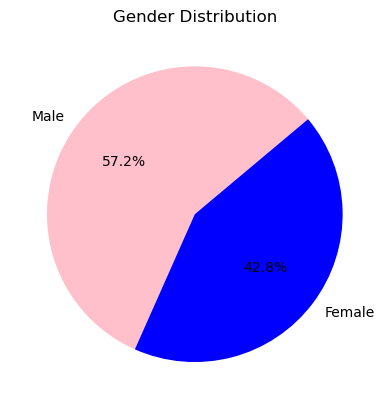

In [55]:
# Plotting a pie chart of 'gender' column value counts 
sleep_df['gender'].value_counts().plot.pie(autopct='%1.1f%%', startangle=40, colors=['pink', 'blue'])
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

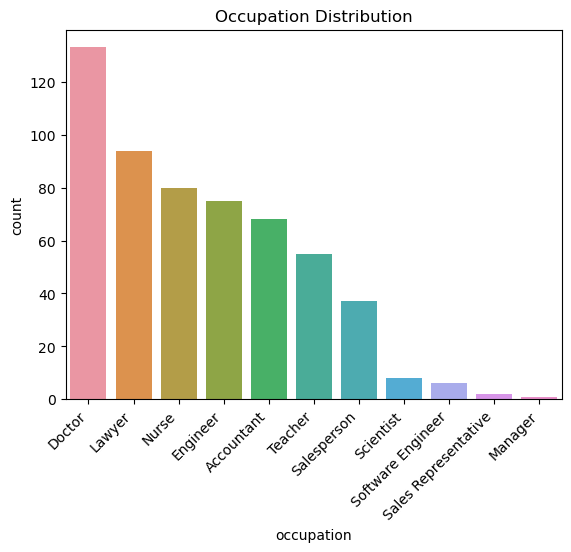

In [56]:
# Distribution of occupation 
occupation = sleep_df['occupation'].value_counts()
sns.barplot(x=occupation.index, y=occupation)
plt.xticks(rotation=45, ha='right')
plt.title('Occupation Distribution')
plt.show()


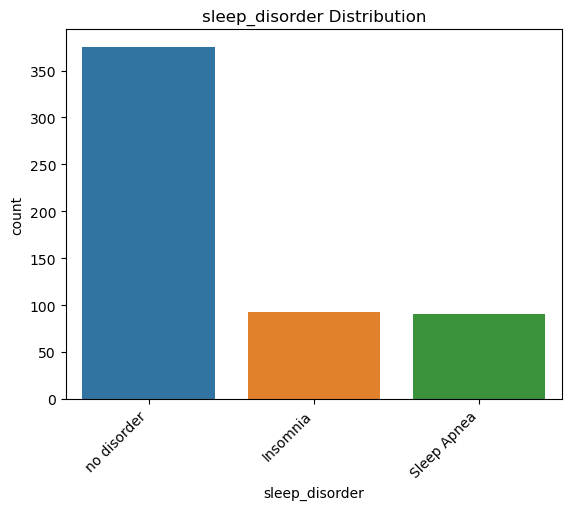

In [58]:
# Distribution sleep disorder 
sleep_disorder  = sleep_df['sleep_disorder'].value_counts()
sns.barplot(x=sleep_disorder.index, y=sleep_disorder)
plt.xticks(rotation=45, ha='right')
plt.title('sleep_disorder Distribution')
plt.show()

2 - Continuous variables 

In [59]:
# Summary statistics for the dataset
summary = df_numerical.describe().round(2)
summary

,person_id,age,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,heart_rate,daily_steps
count,559.00,559.00,559.00,559.00,559.00,559.00,559.00,559.00
mean,280.00,39.99,7.11,7.27,58.76,5.46,70.18,6820.75
std,161.51,8.10,0.74,1.13,19.96,1.67,3.88,1528.81
min,1.00,27.00,5.80,4.00,30.00,3.00,65.00,3000.00
25%,140.50,33.00,6.50,6.00,45.00,4.00,68.00,5500.00
50%,280.00,38.00,7.20,7.00,60.00,5.00,70.00,7000.00
75%,419.50,44.00,7.70,8.00,75.00,7.00,72.00,8000.00
max,559.00,59.00,8.50,9.00,90.00,8.00,86.00,10000.00


Visualization Categorical variable 

array([[<Axes: title={'center': 'person_id'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'sleep_duration'}>],
       [<Axes: title={'center': 'quality_of_sleep'}>,
        <Axes: title={'center': 'physical_activity_level'}>,
        <Axes: title={'center': 'stress_level'}>],
       [<Axes: title={'center': 'heart_rate'}>,
        <Axes: title={'center': 'daily_steps'}>, <Axes: >]], dtype=object)

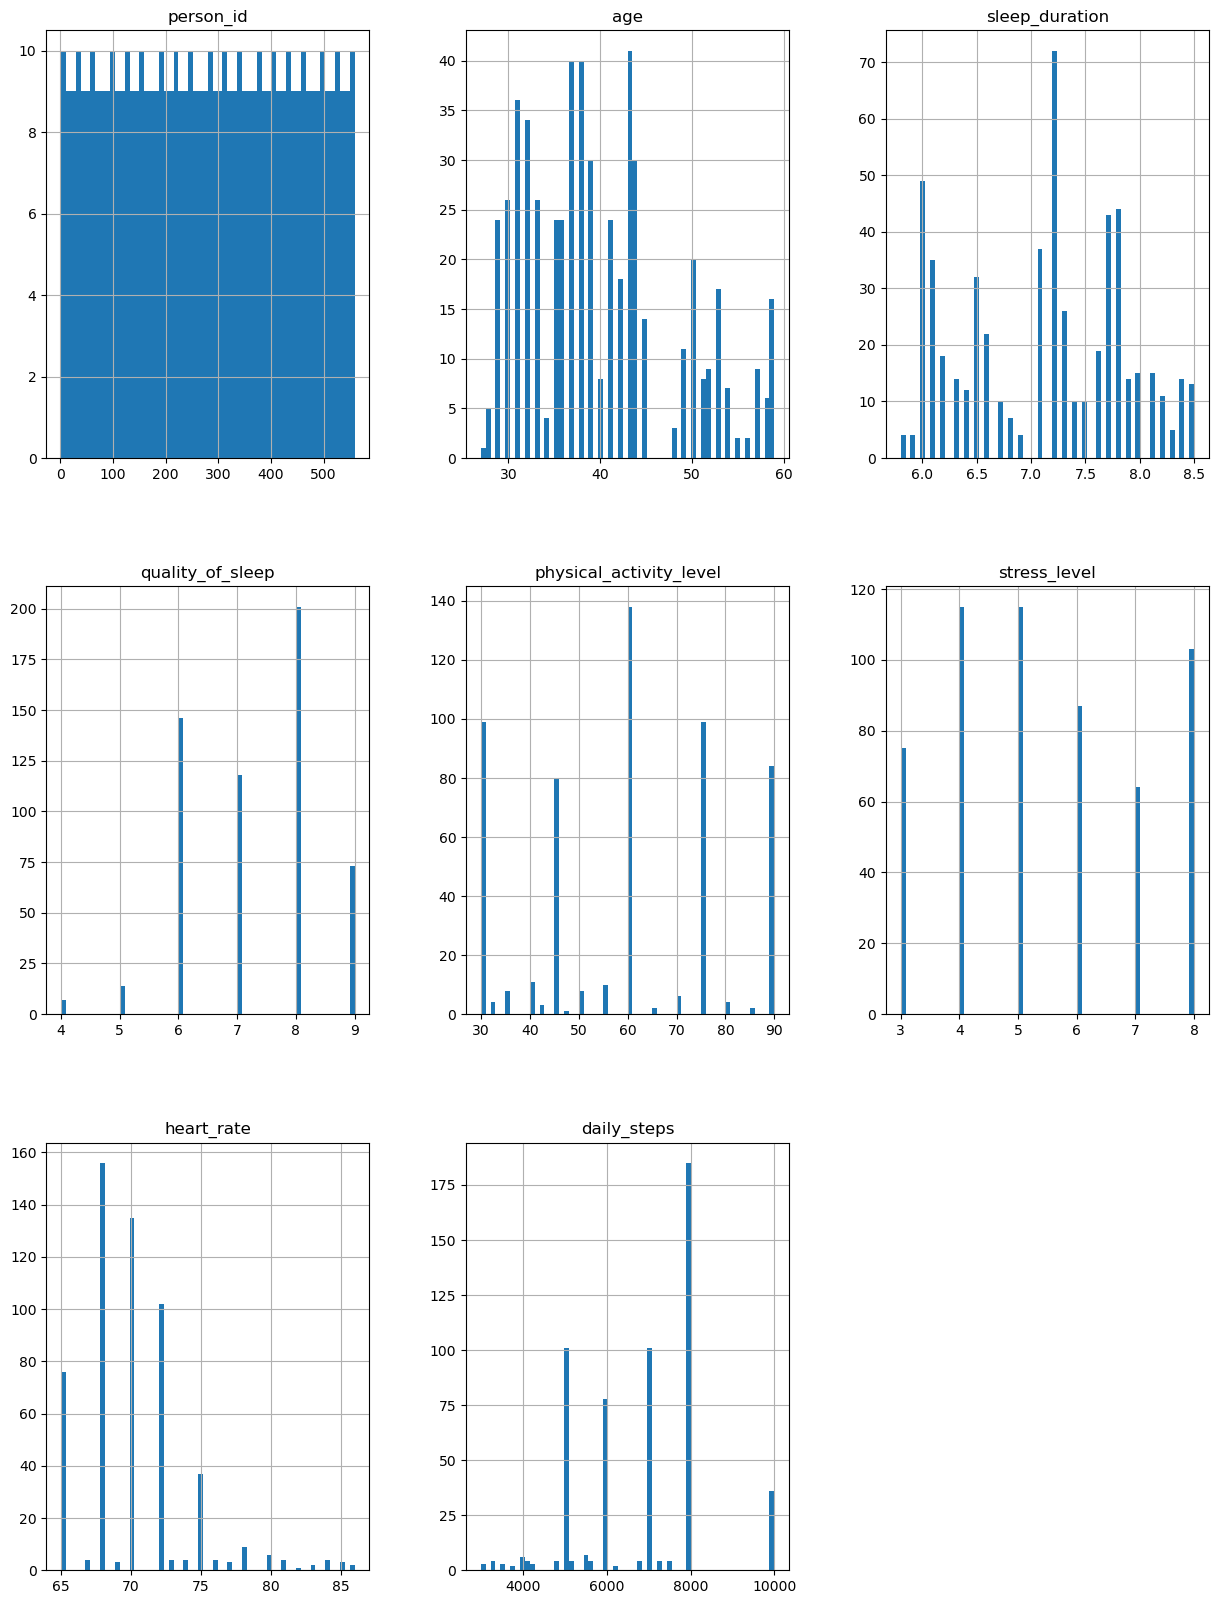

In [60]:
#Creating histograms for each numerical column in 'df_numerical'
df_numerical.hist(figsize=(15, 20), bins=60, xlabelsize=10, ylabelsize=10)

Text(0.5, 1.0, 'Boxplot daily_steps')

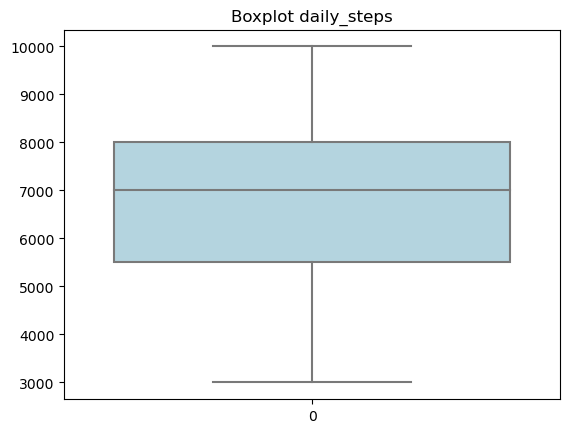

In [61]:
# Plotting a boxplot for the 'daily_steps' column with a light blue color
sns.boxplot(data = sleep_df['daily_steps'], color="lightblue")
plt.title('Boxplot daily_steps')

# Bivariate Analysis

1 -  Find correlation between quality of sleep  and the factors / lifestyle 

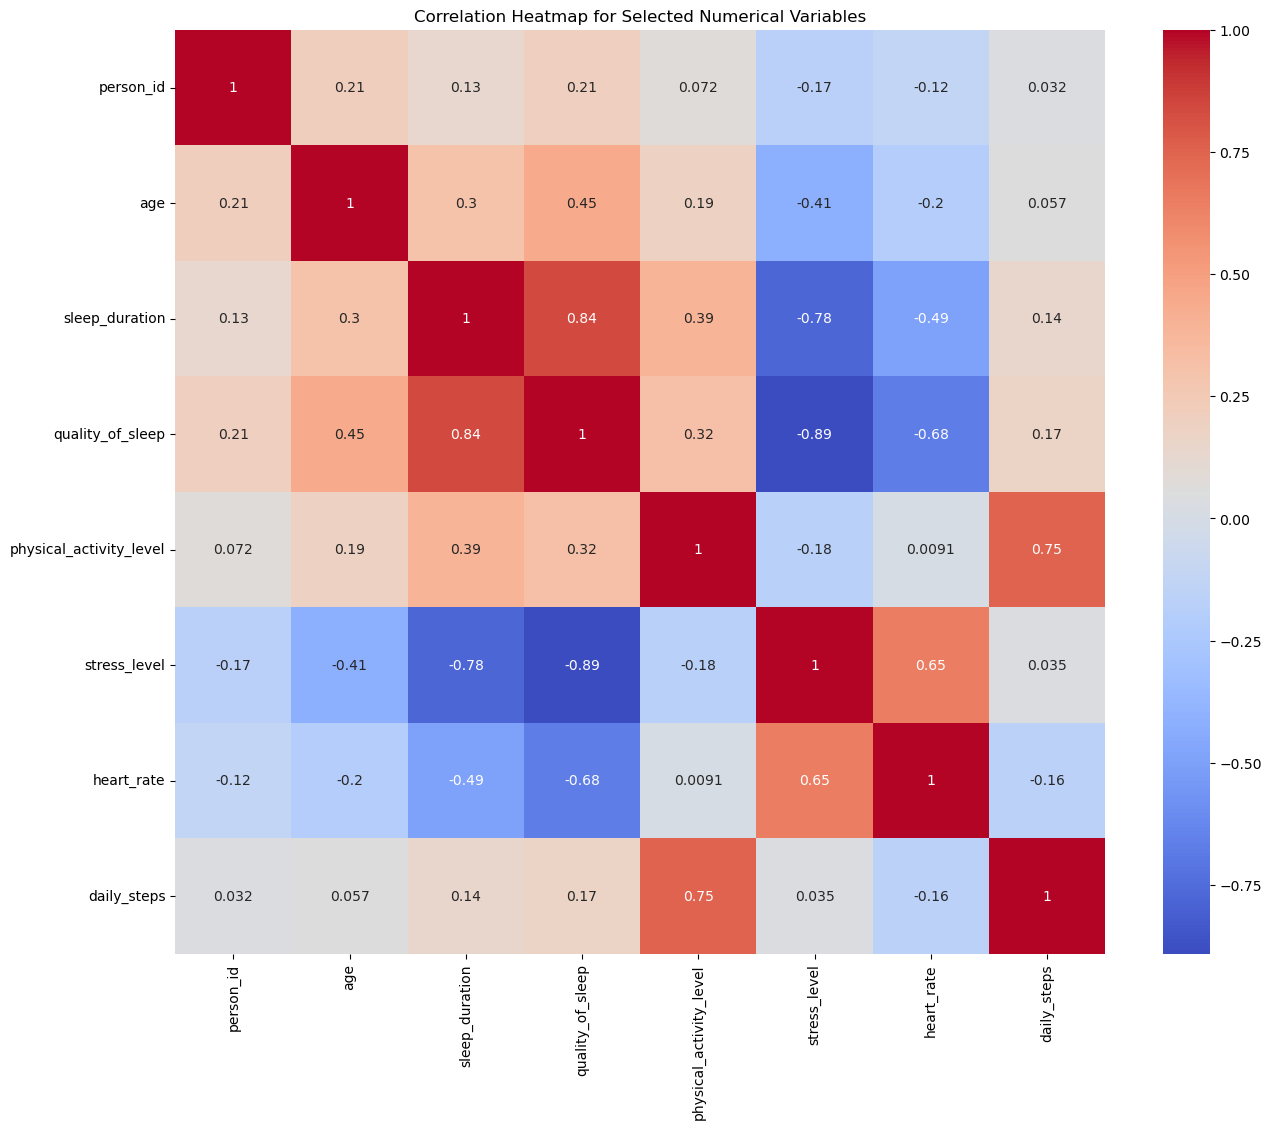

In [62]:
# Correlation heatmap 
correlation_matrix = df_numerical.corr()
# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(15, 12))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

Insight : 

-Strong positive correlation between quality of sleep and sleep duration. 

-Strong negative correlation between stress level and both quality of sleep and sleep duration.

-There is a slight positive correlation between physical activity and quality of sleep.






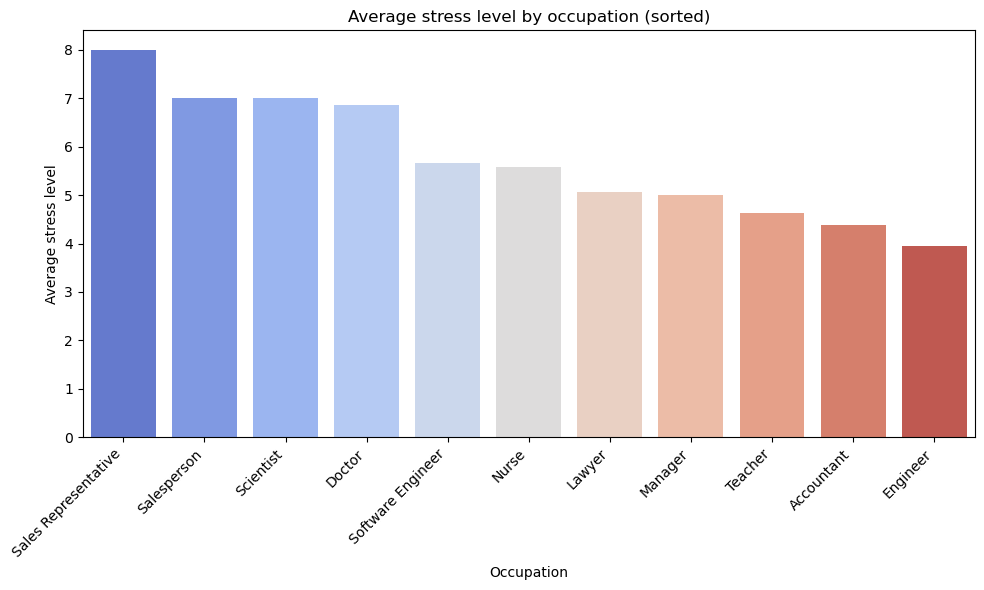

In [63]:

# Compute the average stress level for each occupation
avg_stress_by_occupation = sleep_df.groupby('occupation')['stress_level'].mean().reset_index()

# Sort occupations by average stress level (from highest to lowest)
avg_stress_by_occupation_sorted = avg_stress_by_occupation.sort_values(by='stress_level', ascending=False)

# Bar plot
plt.figure(figsize=(10, 6))  # Set figure size
sns.barplot(data=avg_stress_by_occupation_sorted, x='occupation', y='stress_level', palette="coolwarm")  # Use sorted data
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.title("Average stress level by occupation (sorted)")  # Set title
plt.xlabel("Occupation")  # Set x-axis label
plt.ylabel("Average stress level")  # Set y-axis label
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Show the plot




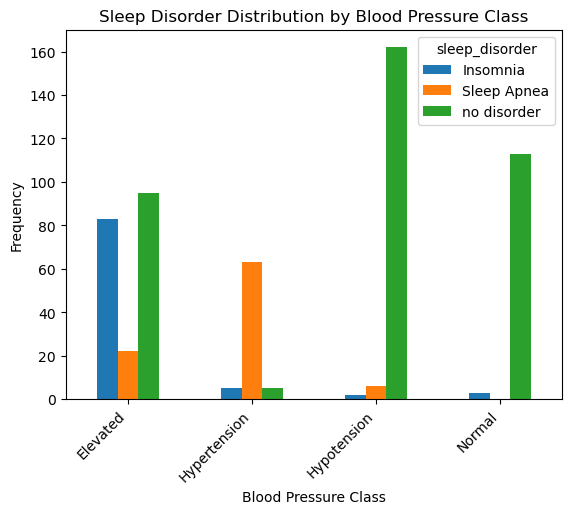

In [64]:
# Sleep Disorder Distribution by Blood Pressure Class
sleep_df.groupby('blood_pressure_class')['sleep_disorder'].value_counts().unstack().plot.bar()
plt.xticks(rotation=45, ha='right') 
plt.xlabel("Blood Pressure Class")
plt.ylabel("Frequency")
plt.title("Sleep Disorder Distribution by Blood Pressure Class")
plt.show()


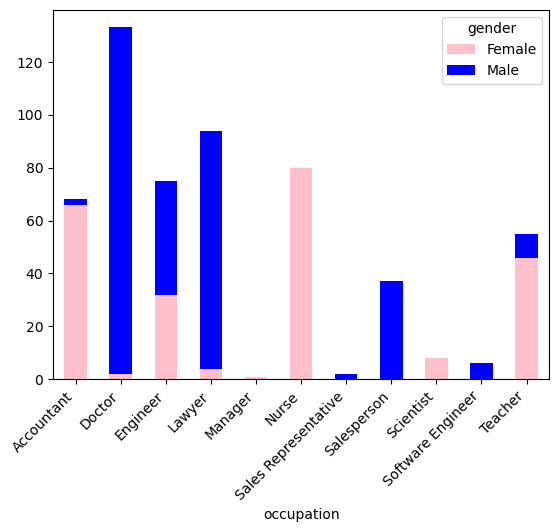

In [65]:
# Calcul du tableau croisé dynamique
crosstab_result = pd.crosstab(sleep_df['occupation'], sleep_df['gender'])

# Définition des couleurs pour chaque catégorie
colors = {'Female': 'pink', 'Male': 'blue'}

# Tracer un diagramme à barres empilées avec les couleurs spécifiées
crosstab_result.plot(kind="bar", stacked=True, color=colors)

# Ajuster les étiquettes d'axe x pour une meilleure lisibilité
plt.xticks(rotation=45, ha='right')

# Afficher le graphe
plt.show()


In [66]:
sleep_df

,person_id,gender,age,occupation,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,id_bmi,heart_rate,daily_steps,sleep_disorder,blood_pressure_class
0,1,Male,27,Software Engineer,6.1,6,42,6,5,77,4200,no disorder,Normal
1,2,Male,28,Doctor,6.2,6,60,8,4,75,10000,no disorder,Normal
2,3,Male,28,Doctor,6.2,6,60,8,4,75,10000,no disorder,Normal
3,4,Male,28,Sales Representative,5.9,4,30,8,6,85,3000,Sleep Apnea,Hypertension
4,5,Male,28,Sales Representative,5.9,4,30,8,6,85,3000,Sleep Apnea,Hypertension
...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,555,Female,43,Teacher,6.7,7,45,4,5,65,6000,Insomnia,Elevated
555,556,Male,43,Salesperson,6.5,6,45,7,5,72,6000,Insomnia,Elevated
556,557,Female,43,Teacher,6.7,7,45,4,5,65,6000,Insomnia,Elevated
557,558,Male,43,Salesperson,6.4,6,45,7,5,72,6000,Insomnia,Elevated


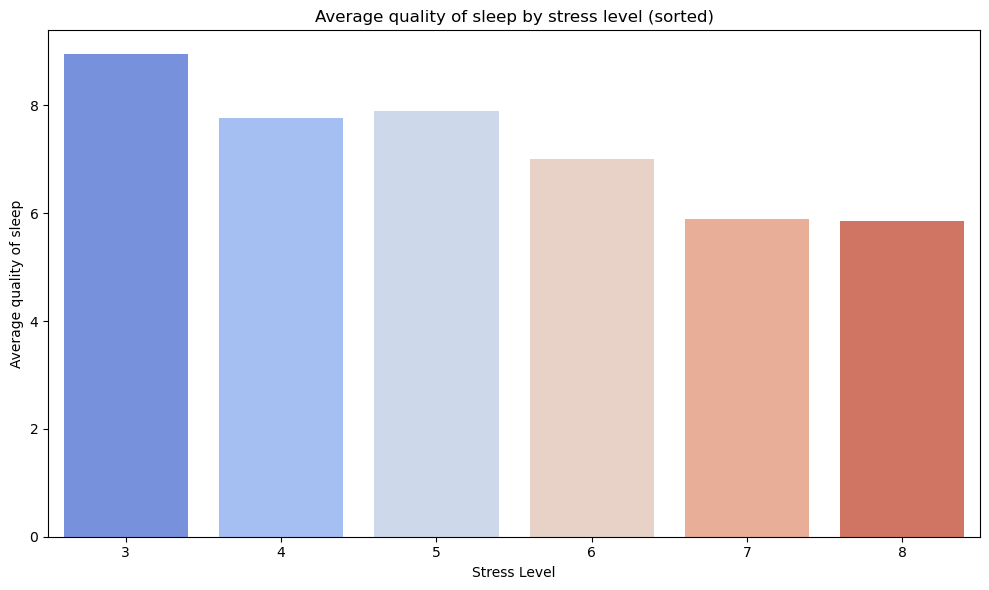

In [69]:
# Calcul de la qualité moyenne du sommeil par niveau de stress
avg_sleep_by_stress_level = sleep_df.groupby('stress_level')['quality_of_sleep'].mean().reset_index()

# Trier les niveaux de stress par qualité moyenne du sommeil (du plus élevé au plus bas)
avg_sleep_by_stress_level_sorted = avg_sleep_by_stress_level.sort_values(by='quality_of_sleep', ascending=False)

# Tracé du diagramme à barres
plt.figure(figsize=(10, 6))  # Définir la taille de la figure
sns.barplot(data=avg_sleep_by_stress_level_sorted, x='stress_level', y='quality_of_sleep', palette="coolwarm")  # Utiliser les données triées
plt.title("Average quality of sleep by stress level (sorted)")  # Définir le titre
plt.xlabel("Stress Level")  # Définir l'étiquette de l'axe des x
plt.ylabel("Average quality of sleep")  # Définir l'étiquette de l'axe des y
plt.tight_layout()  # Ajuster la mise en page pour éviter les chevauchements
plt.show()  # Afficher le graphique


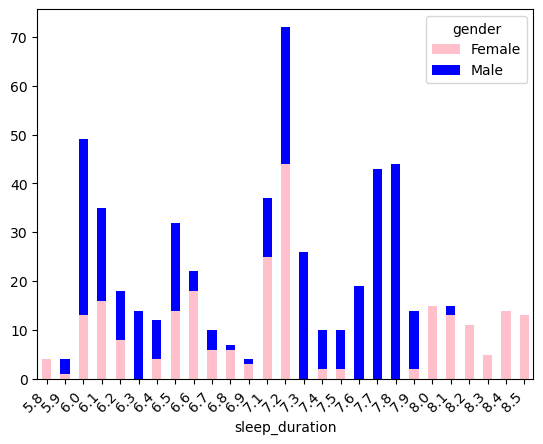

In [70]:
# Calcul du tableau croisé dynamique
crosstab_result = pd.crosstab(sleep_df['sleep_duration'], sleep_df['gender'])

# Définition des couleurs pour chaque catégorie
colors = {'Female': 'pink', 'Male': 'blue'}

# Tracer un diagramme à barres empilées avec les couleurs spécifiées
crosstab_result.plot(kind="bar", stacked=True, color=colors)

# Ajuster les étiquettes d'axe x pour une meilleure lisibilité
plt.xticks(rotation=45, ha='right')

# Afficher le graphe
plt.show()